In [ ]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

In [ ]:
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Data
exoplanets = pd.read_csv("/content/drive/MyDrive/Exoplanets/(Everything)PSCompPars_2022.04.03_12.52.04.csv", sep=',', skiprows=1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
exoplanets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbsmax,...,st_metratio,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.030000,1.290000,...,[Fe/H],2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,1.530000,...,[Fe/H],1.93,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.840000,0.830000,...,[Fe/H],2.63,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,5.23133,2.331,4.91781
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1773.400020,2.930000,...,[Fe/H],4.45,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935,4.714,6.38300
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.660000,...,[Fe/H],4.36,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,6.21500,4.651,6.06428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.059222,...,[M/H],4.13,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
5005,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.827774,...,[M/H],4.13,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
5006,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,2.513290,...,[M/H],4.13,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
5007,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,1.180000,...,[Fe/H],2.46,11h36m56.93s,174.237219,-00d49m24.83s,-0.823564,52.5973,4.30490,2.184,4.03040


In [ ]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5009 non-null   object 
 1   hostname         5009 non-null   object 
 2   sy_snum          5009 non-null   int64  
 3   sy_pnum          5009 non-null   int64  
 4   discoverymethod  5009 non-null   object 
 5   disc_year        5009 non-null   int64  
 6   disc_facility    5009 non-null   object 
 7   pl_controv_flag  5009 non-null   int64  
 8   pl_orbper        4840 non-null   float64
 9   pl_orbsmax       4750 non-null   float64
 10  pl_rade          4995 non-null   float64
 11  pl_radj          4993 non-null   float64
 12  pl_bmasse        4986 non-null   float64
 13  pl_bmassj        4986 non-null   float64
 14  pl_bmassprov     5009 non-null   object 
 15  pl_orbeccen      4371 non-null   float64
 16  pl_insol         3204 non-null   float64
 17  pl_eqt        

## How does the transit discovery method compare to other discovery methods in terms of the number of exoplanets discovered? 


In [ ]:
# List of discovery types
x = np.array(exoplanets["discoverymethod"])
discovery_types = np.unique(x)

In [ ]:
#Tells how many discovery types there are
discovery_types 

array(['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations',
       'Imaging', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity',
       'Transit', 'Transit Timing Variations'], dtype=object)

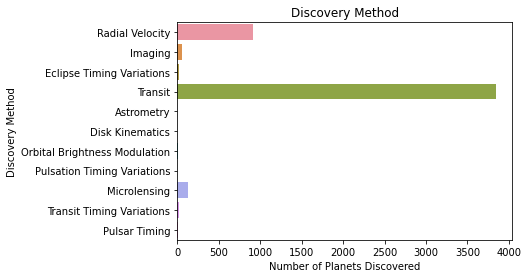

In [ ]:
ax1 = sns.countplot(y='discoverymethod', data=exoplanets)
ax1.set(xlabel='Number of Planets Discovered', ylabel='Discovery Method', title='Discovery Method')
plt.show()

We can clearly see that transit is the most common method of discovery, although in more recent years scientists have made advancements in the other discovery methods. The other methods are not at zero, but the scale of the graph makes it seem like there is no bar at all.

Here is a link to [a dynamic discovery method by year graph](https://app.flourish.studio/visualisation/8761129/edit )  

Radial velocity was popular in the 1990s, and the transit method was introduced around 2005 and became the most predominant method. 

## How does the transit discovery method compare to other discovery methods in terms of the orbit period?

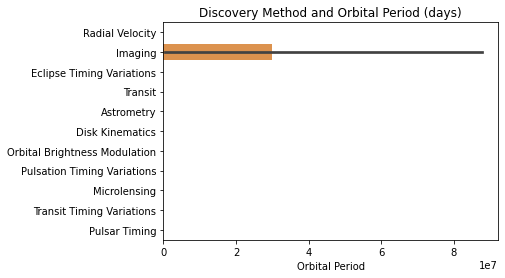

In [ ]:
ax2 = sns.barplot(y='discoverymethod', x='pl_orbper', data=exoplanets)
ax2.set(xlabel='Orbital Period', ylabel='', title='Discovery Method and Orbital Period (days)')
plt.show()

In this graph, the imaging method is skewing the data, making it difficult to see the orbital periods in the other discovery methods. We will remove imaging from the following graph.

In [ ]:
#df2
df2 = exoplanets[exoplanets.discoverymethod != "Imaging"]

In [ ]:
print(df2)

         pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0       11 Com b    11 Com        2        1  Radial Velocity       2007   
1       11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2       14 And b    14 And        1        1  Radial Velocity       2008   
3       14 Her b    14 Her        1        2  Radial Velocity       2002   
4     16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   
...          ...       ...      ...      ...              ...        ...   
5004   ups And b   ups And        2        3  Radial Velocity       1996   
5005   ups And c   ups And        2        3  Radial Velocity       1999   
5006   ups And d   ups And        2        3  Radial Velocity       1999   
5007   ups Leo b   ups Leo        1        1  Radial Velocity       2021   
5008    xi Aql b    xi Aql        1        1  Radial Velocity       2007   

                               disc_facility  pl_controv_flag    pl_orbper  \
0        

In [ ]:
x = np.array(df2["discoverymethod"])
discovery_types = np.unique(x)

In [ ]:
print(discovery_types)

['Astrometry' 'Disk Kinematics' 'Eclipse Timing Variations' 'Microlensing'
 'Orbital Brightness Modulation' 'Pulsar Timing'
 'Pulsation Timing Variations' 'Radial Velocity' 'Transit'
 'Transit Timing Variations']


We are verifying that the imaging discovery method is no longer included in this data frame.

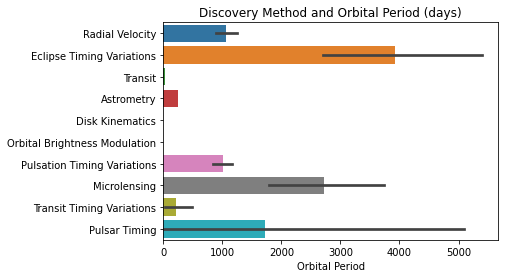

In [ ]:
ax2 = sns.barplot(y='discoverymethod', x='pl_orbper', data=df2)
ax2.set(xlabel='Orbital Period', ylabel='', title='Discovery Method and Orbital Period (days)')
plt.show()

Here, we can see the different discovery methods and the average orbital periods for each method. 
The transit method is a phenomenon when a celestial body passes directly between a larger body and the observer. The transit method has a much smaller orbital period on average, which makes sense because it is easier for astronomers to take more than one measurement of the star using the transit method if there is a shorter orbital period. Also, astronomers would be better able to measure the exoplanet if it is closer to the star. 

## How does the transit discovery method compare to other discovery methods in terms of the size of discovered planets?


In [ ]:
# List of radii
pl_rade_min = min(exoplanets["pl_rade"])
pl_rade_max = max(exoplanets["pl_rade"])
print(pl_rade_min, " - ", pl_rade_max)

TypeError: ignored

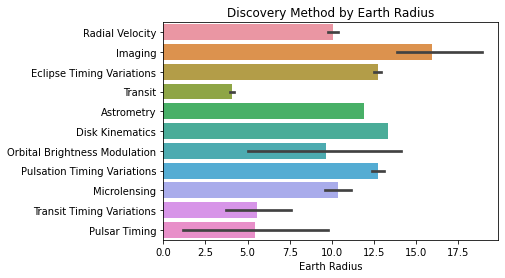

In [ ]:
ax1 = sns.barplot(y='discoverymethod', x='pl_rade', data=exoplanets)
ax1.set(xlabel='Earth Radius', ylabel='', title='Discovery Method by Earth Radius')
plt.show()

The average radius for exoplanets discovered using the transit method is approximately 4.8 times larger than the Earth's radius. 
This is small compared to other discovery methods. The largest average is imaging, which uses infrared wavelengths to capture iamges of exoplanets directly. 

## Which class of stars have the most planets around them? (star types O, B, A, F, G, K, M, in order of decreasing temperatures)


We will convert the temperature variable into categorical ones by putting them into star types based on the range.

In [ ]:
df3 = pd.cut(exoplanets.st_teff,bins=[0,3500,5000,6000,7500,10000,30000,60000],labels=["M","K","G","F","A","B","O"])

In [ ]:
print(df3)

0       K
1       K
2       K
3       G
4       G
       ..
5004    F
5005    F
5006    F
5007    K
5008    K
Name: st_teff, Length: 5009, dtype: category
Categories (7, object): ['M' < 'K' < 'G' < 'F' < 'A' < 'B' < 'O']


In [ ]:
df3 = df3.to_frame()


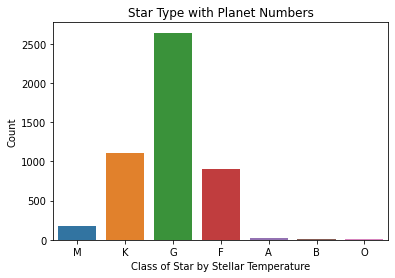

In [ ]:
ax1 = sns.countplot(x='st_teff', data=df3)
ax1.set(xlabel='Class of Star by Stellar Temperature', ylabel='Count', title='Star Type with Planet Numbers')
plt.show()

Star types used: M (0-3500 Kelvin), K (3500-5000 Kelvin), G (5000-6000 Kelvin), F (6000-7500 Kelvin), A (7500-10000 Kelvin), B (10000-30000 Kelvin), O (30000-60000 Kelvin)

The cooler star types start from M, and the hottest star type is type O. 

Our sun is in the class G star. 

We can see that star types F, G, and K are the most common. There are not as many for star types A, B, and O, which may be because the methods used cannot detect exoplanets with stars of such a high temperature. 

Transit methods are the most common with a smaller orbital period -- may be more difficult to use the transit method for a hotter star, since the exoplanets may need a larger orbital period so they won't burn up. 

## Consider the planets that meet the parameters for the Habitable Zone (equilibrium temperature (planet surface) of 180-310 degrees K, and insolation flux factor of .25-2.2 (amount of radiation the planet receives from the star it is orbiting)

#16 and #17 (pl_insol and pl_eqt)

In [ ]:
exoplanets.pl_insol

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5004   NaN
5005   NaN
5006   NaN
5007   NaN
5008   NaN
Name: pl_insol, Length: 5009, dtype: float64

In [ ]:
exoplanets.pl_eqt

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5004   NaN
5005   NaN
5006   NaN
5007   NaN
5008   NaN
Name: pl_eqt, Length: 5009, dtype: float64

In [ ]:
df5=exoplanets[["pl_insol", "pl_eqt"]]
df5.head()

,pl_insol,pl_eqt
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [ ]:
df5=df5.dropna()
df5.head()

,pl_insol,pl_eqt
72,8.60,464.0
112,132.26,938.0
123,145.10,850.0
144,3.50,431.0
158,4293.00,2119.0


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3115 entries, 72 to 4997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pl_insol  3115 non-null   float64
 1   pl_eqt    3115 non-null   float64
dtypes: float64(2)
memory usage: 73.0 KB


In [ ]:
#copying df5 to filter and slowly start filtering out non-habitable  
df5_filter = df5
#df5_filter = df5[df5['pl_insol'] >= .25 & <= 2.2] 

insol_filter = (df5['pl_insol'] >= .25) & (df5['pl_insol'] <= 2.2)

#df5_filter = df5[df5['pl_insol'] <= 2.2
df5_filter = df5.loc[insol_filter]

In [ ]:
min = df5_filter["pl_insol"].min()
max = df5_filter["pl_insol"].max()

print("min:" + str(min))
print("max:" + str(max))

min:0.25
max:2.18


In [ ]:


eqt_filter = (df5['pl_eqt'] >= 180) & (df5['pl_eqt'] <= 310)

df5_filter = df5.loc[eqt_filter]

In [ ]:
min = df5_filter["pl_eqt"].min()
max = df5_filter["pl_eqt"].max()

print("min:" + str(min))
print("max:" + str(max))

min:182.0
max:310.0


In [ ]:
count_habplan=df5_filter.dropna().count()

In [ ]:
print(count_habplan)

pl_insol    105
pl_eqt      105
dtype: int64
